# CreditRiskData Project
In this case study, our task is to create a machine learning model which can predict if a loan application can be approved or not based on its characteristics like what is the duration, purpose and amount of loan.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

## 1. Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "creditRiskData.csv". This file contains 1000 historical data of the good and bad loans issued.

The goal is to learn from this data and predict if a given loan application should be approved or rejected!

## Data description
The business meaning of each column in the data is as below

* <b>GoodCredit</b>: Whether the issued loan was a good decision or bad
* <b>checkingstatus</b>: Status of existing checking account.
* <b>duration</b>: Duration of loan in months
* <b>history</b>: Credit history of the applicant
* <b>purpose</b>: Purpose for the loan
* <b>amount</b>: Credit amount
* <b>savings</b>: Savings account/bonds
* <b>employ</b>: Present employment since
* <b>installment</b>: Installment rate in percentage of disposable income
* <b>status</b>: Personal status and sex
* <b>others</b>: Other debtors / guarantors for the applicant
* <b>residence</b>: Present residence since
* <b>property</b>: Property type of applicant
* <b>age</b>: Age in years
* <b>otherplans</b>: Other installment plans
* <b>housing</b>: Housing
* <b>cards</b>: Number of existing credits at this bank
* <b>job</b>: Job
* <b>liable</b>: Number of people being liable to provide maintenance for
* <b>tele</b>: Is the Telephone registered or not
* <b>foreign</b>: Is the applicant a foreign worker

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CreditRiskData=pd.read_csv('CreditRiskData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


## 2. Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: 	GoodCredit 
* Predictors: duration, history, purpose, amount, savings etc.

* GoodCredit=1 means the loan was a good decision.
* GoodCredit=0 means the loan was a bad decision.

## 3. Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

## 4. Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='GoodCredit'>

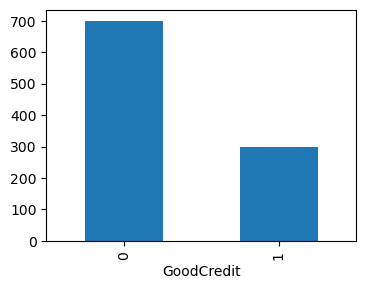

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are equal number of rows for each category to learn from.

## 5. Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the approval or rejection of loan?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
​
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
CreditRiskData.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [6]:
# Looking at the descriptive statistics of the data
CreditRiskData.describe(include='all')

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CreditRiskData.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>GoodCredit</b>: Categorical. Selected. This is the <b>Target Variable</b>!
* <b>checkingstatus</b>: Categorical. Selected.
* <b>duration</b>: Continuous. Selected.
* <b>history</b>: Categorical. Selected
* <b>purpose</b>: Categorical. Selected
* <b>amount</b>: Continuous. Selected.
* <b>savings</b>: Categorical. Selected
* <b>employ</b>: Categorical. Selected
* <b>installment</b>: Categorical. Selected
* <b>status</b>: Categorical. Selected
* <b>others</b>: Categorical. Selected
* <b>residence</b>: Categorical. Selected
* <b>property</b>: Categorical. Selected
* <b>age</b>: Continuous. Selected.
* <b>otherplans</b>: Categorical. Selected
* <b>housing</b>: Categorical. Selected
* <b>cards</b>: Categorical. Selected
* <b>job</b>: Categorical. Selected
* <b>liable</b>: Categorical. Selected
* <b>tele</b>: Categorical. Selected
* <b>foreign</b>: Categorical. Selected


## 6. Removing useless columns from the data
There are no qualitative columns in this data

## 7. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign'

We use bar charts to see how the data is distributed for these categorical columns.

Since there are so many categorical predictors! We will call below function for 5 at a time.

In [8]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

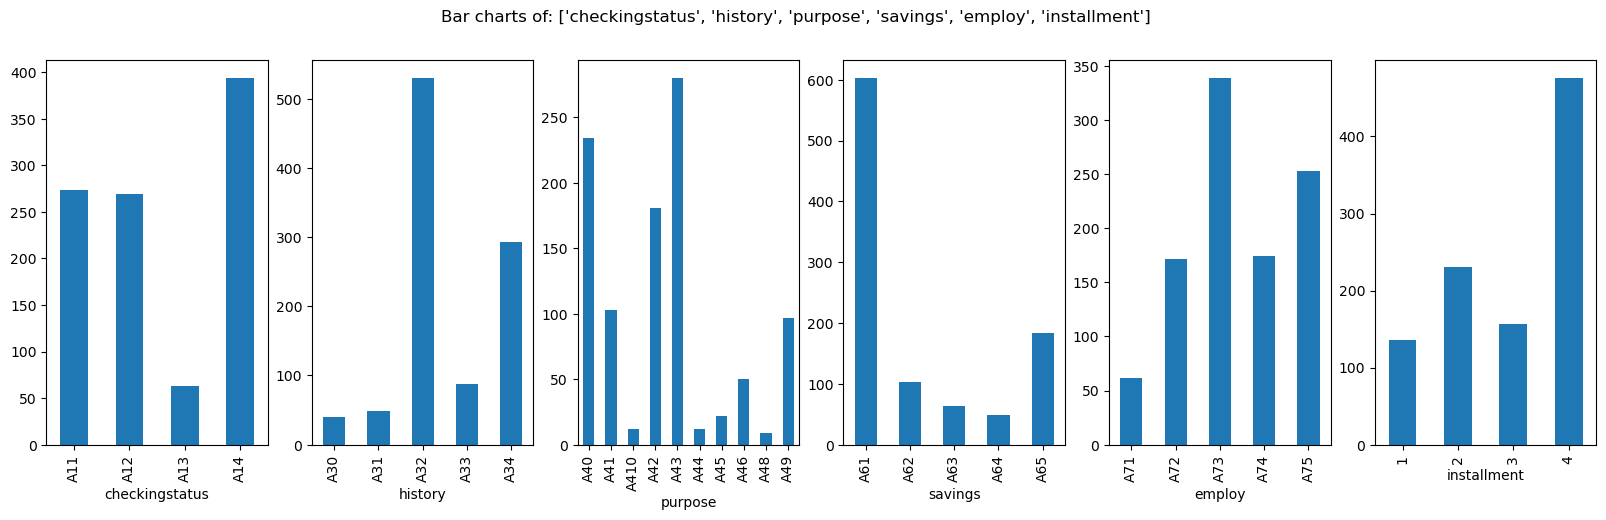

In [9]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['checkingstatus', 'history', 'purpose','savings','employ', 'installment'])

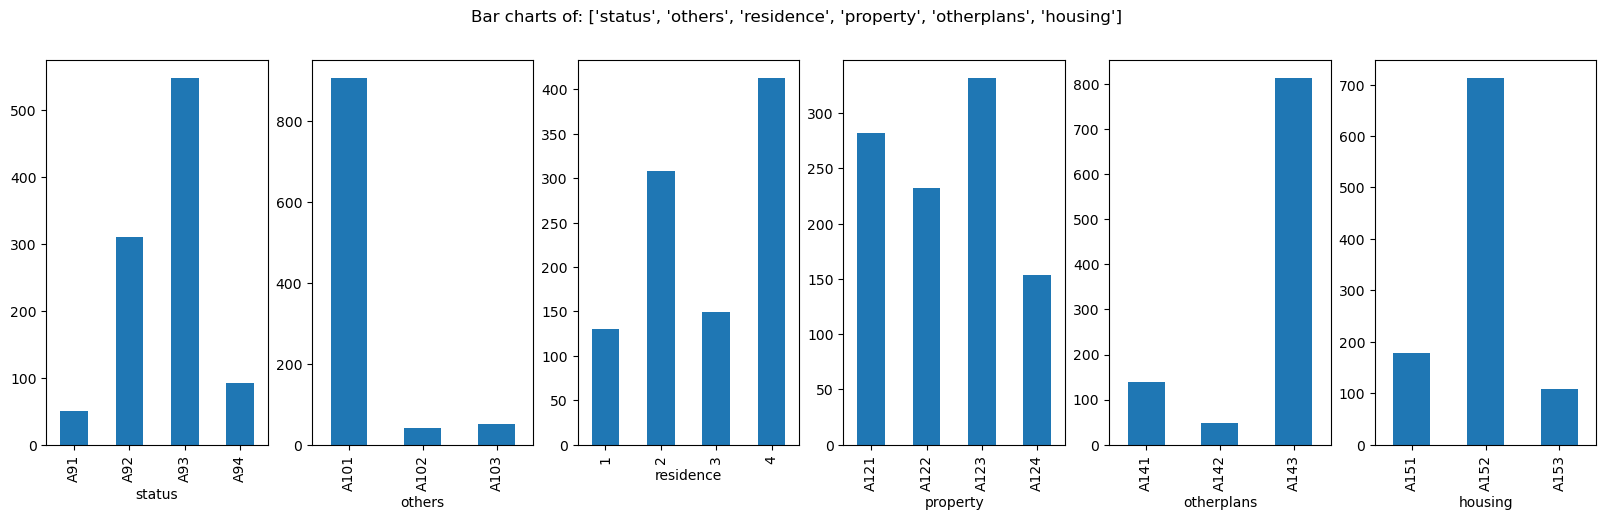

In [10]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['status', 'others','residence', 'property','otherplans', 'housing'])

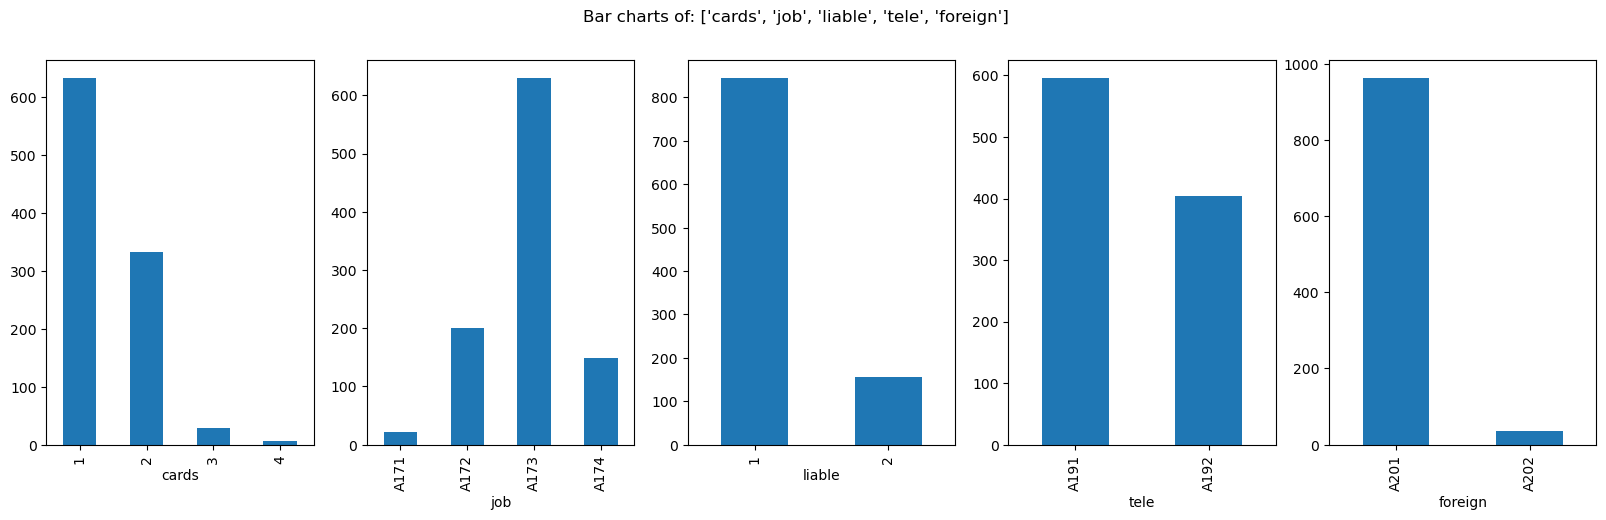

In [11]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['cards', 'job', 'liable', 'tele', 'foreign'])

### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except 'foreign' and 'others' have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign', 'foreign' and 'others' 

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are three continuous predictor variables  'duration', 'amount',and 'age'.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

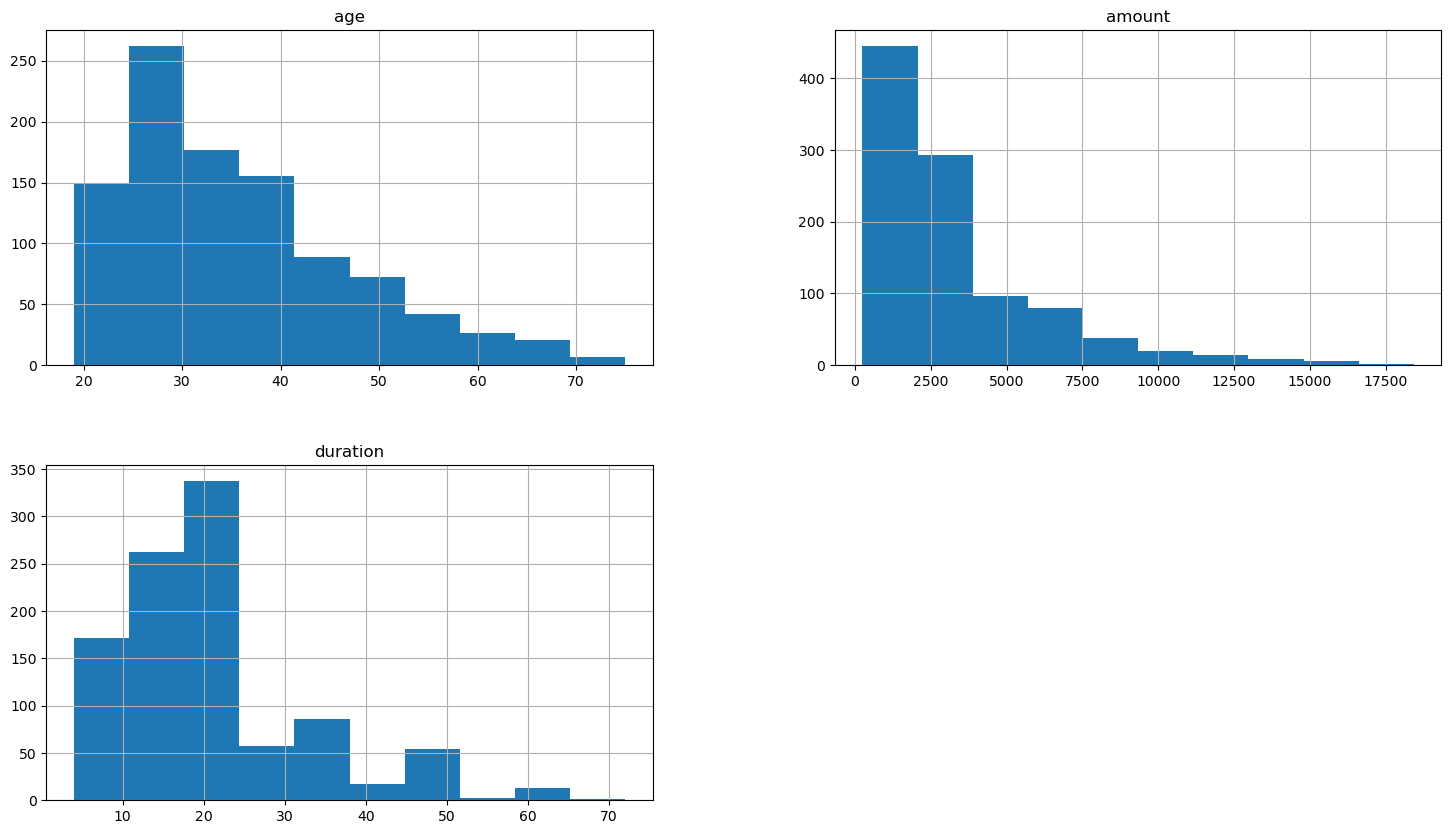

In [12]:
# Plotting histograms of multiple columns together
CreditRiskData.hist(['age', 'amount','duration'], figsize=(18,10))

### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 260 rows in data that has a Width between 25 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>age</b> : Selected. The distribution is slightly skewed, but that is acceptable.
* <b>amount</b>: Selected. The distribution is slightly skewed, but that is acceptable.
* <b>duration</b>: Selected. The distribution is slightly skewed, but that is acceptable.

'age', 'amount','duration'

## 8. Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

###### No Outliers to treat

## 9. Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables

In [13]:
# Finding how many missing values are there for each column
CreditRiskData.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

##### No missing values in this data.

## 10. Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

#### In this case study the Target variable is Continuous, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

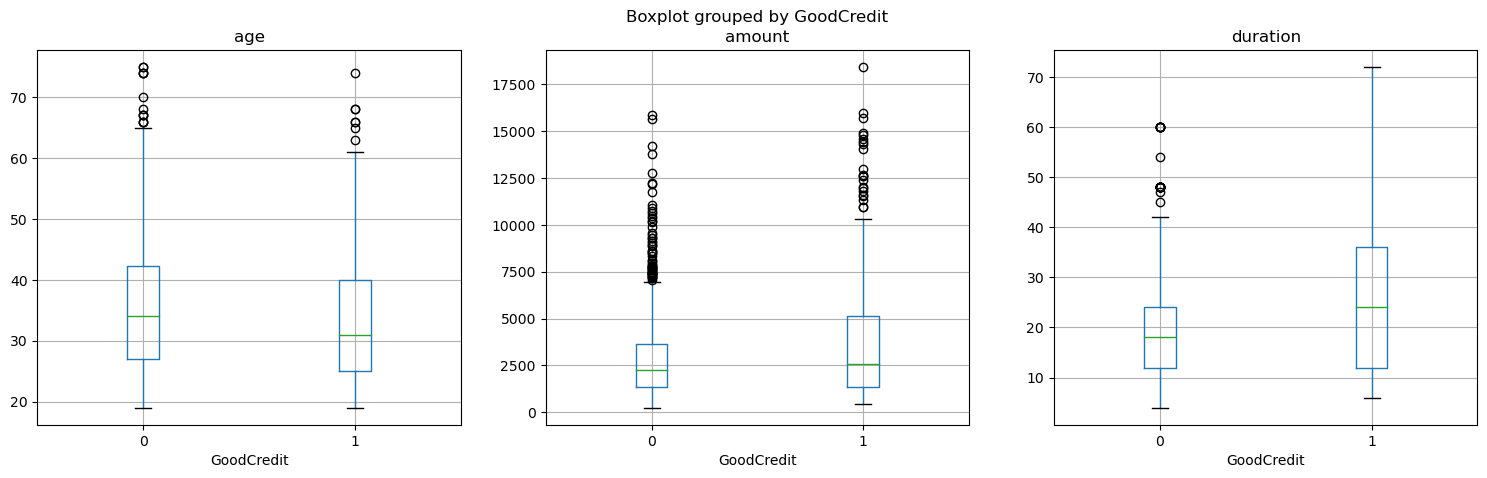

In [14]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [15]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [16]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age','amount', 'duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

The results of ANOVA confirm our visual analysis using box plots above!

Notice the P-Value of "age", it is just at the boundry of the threshold. This is something we already doubted in the box plots section already.

While the other two P-Values are clearly zero, hence they are correlated without doubt.

All three columns are correlated with GoodCredit.

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [17]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=CreditRiskData['checkingstatus'], columns=CreditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


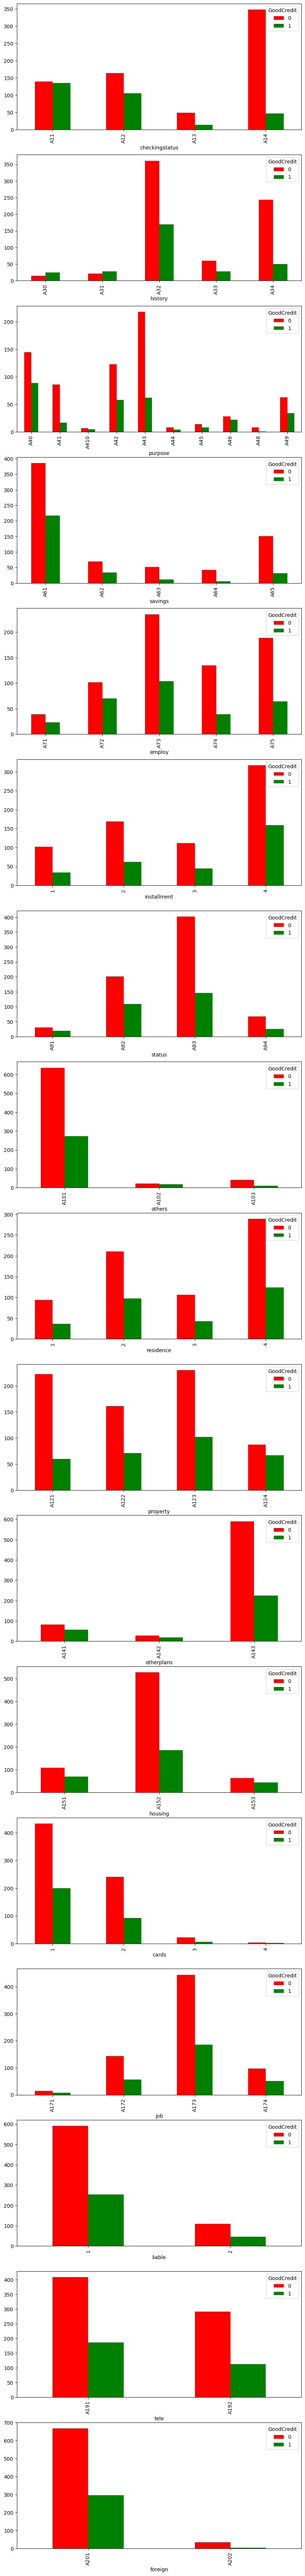

In [18]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

#### Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the "tele" Vs "GoodCredit" plot. The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.

On the other hand, look at the "history" vs "GoodCredit" plot. The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [19]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [20]:
CategoricalVariables=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

# Calling the function
FunctionChisq(inpData=CreditRiskData, 
              TargetVariable='GoodCredit',
              CategoricalVariablesList= CategoricalVariables)

checkingstatus is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ is correlated with GoodCredit | P-Value: 0.001045452349140254
installment is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status is correlated with GoodCredit | P-Value: 0.02223800546926877
others is correlated with GoodCredit | P-Value: 0.036055954027247226
residence is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job is NOT correlated with GoodCredit | P-Value: 0.596581591

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign'

###  Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [21]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [22]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## 11. Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### 1. Converting each Ordinal Categorical columns to numeric
Based on the information on the column values explanation from the data website

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

"employ" column has ordinal properties.

In [23]:
# Treating the Ordinal variable first
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping

In [24]:
# Treating the binary nominal variable
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


#### 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [25]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=CreditRiskData['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()

,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


## 12. Machine Learning: Splitting the data into Training and Testing sample
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [26]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'GoodCredit'],
      dtype='object')

In [27]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

## 13. Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [28]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [29]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


## 14.1 Logistic Regression

In [30]:
import time
T1=time.time()
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       216
           1       0.64      0.42      0.50        84

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.75      0.77      0.75       300

[[196  20]
 [ 49  35]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.78666667 0.66403326 0.75159817 0.71776316 0.76028751 0.80460526
 0.63733333 0.77519841 0.77229833 0.7343254 ]

Final Average Accuracy of the model: 0.74
Time taken: 0.20696735382080078


## 14.2 Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       216
           1       0.45      0.29      0.35        84

    accuracy                           0.70       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.67      0.70      0.68       300

[[187  29]
 [ 60  24]]
Accuracy of the model on Testing Sample Data: 0.68

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7
Time taken: 0.12210655212402344


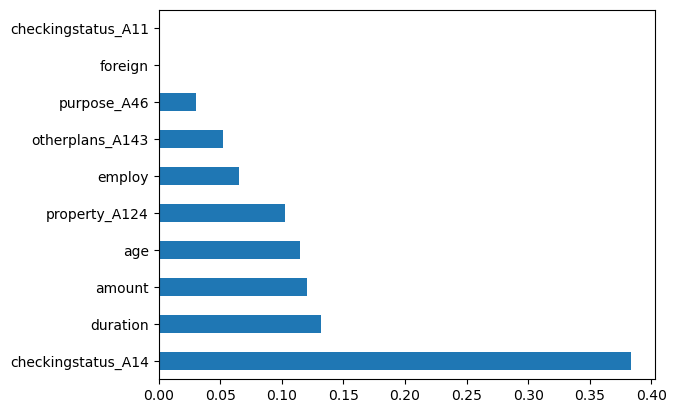

In [31]:
import time
T1=time.time()
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a Decision Tree

In [32]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

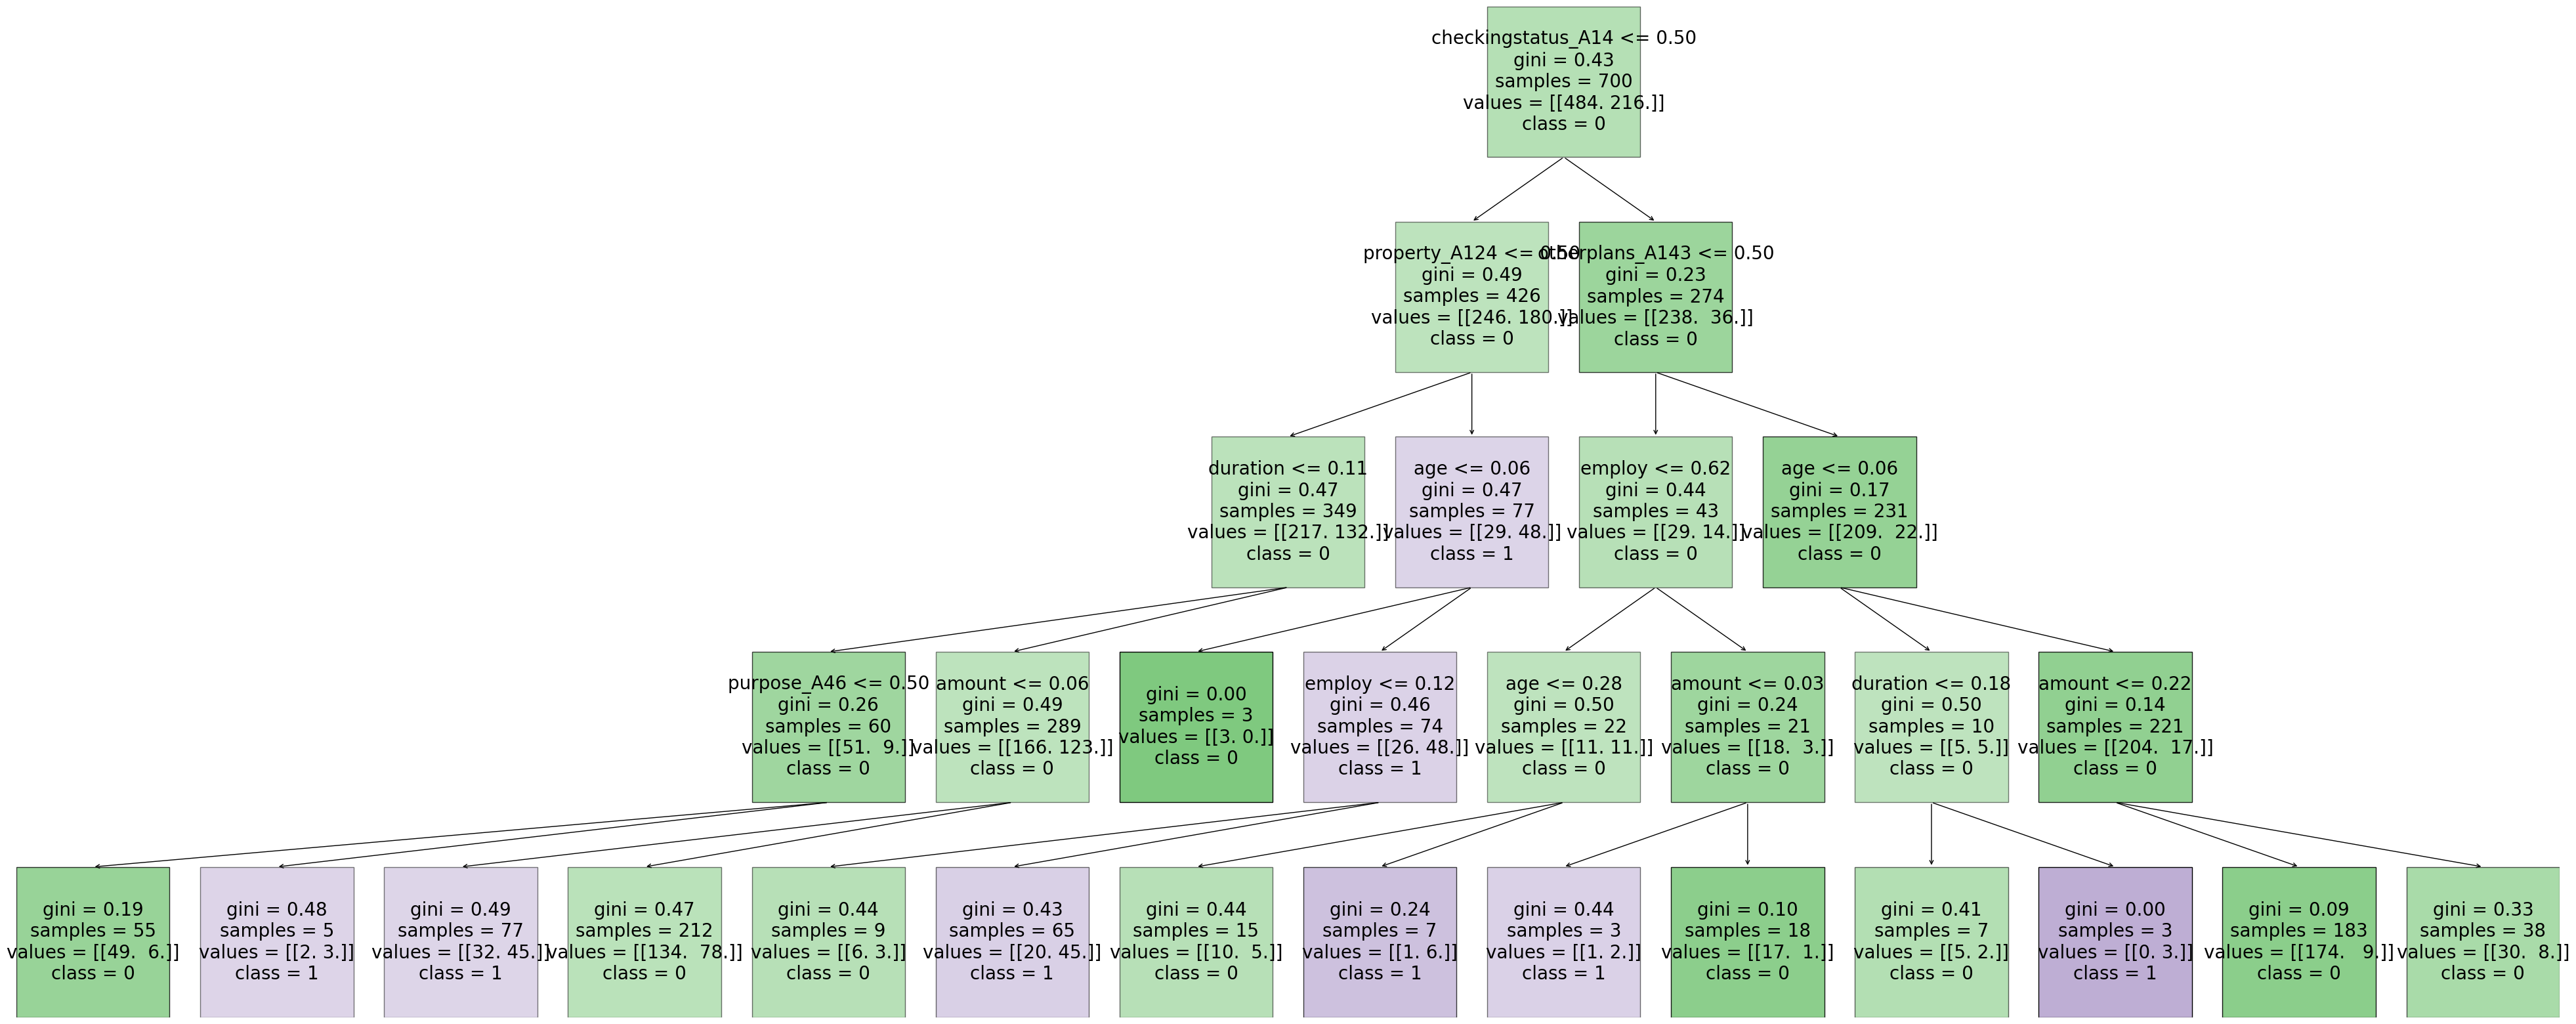

In [33]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=[0,1,2])
#dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## 14.3 Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.78      0.94      0.86       216
           1       0.69      0.32      0.44        84

    accuracy                           0.77       300
   macro avg       0.74      0.63      0.65       300
weighted avg       0.76      0.77      0.74       300

[[204  12]
 [ 57  27]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.79897355 0.73438735 0.72702703 0.74796273 0.76987902 0.715
 0.68344988 0.81101871 0.71225296 0.75665219]

Final Average Accuracy of the model: 0.75
Time taken: 2.1077702045440674


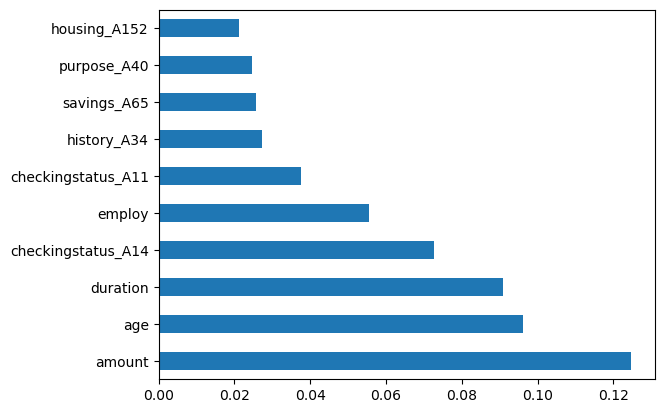

In [34]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision Trees in Random Forest

In [35]:
# max_depth=10 is too large to be plot here
# PLotting a single Decision Tree from Random Forest
#from dtreeplt import dtreeplt
#dtree = dtreeplt(model=clf.estimators_[3], feature_names=Predictors, target_names=TargetVariable)
#fig = dtree.view()
#currentFigure=plt.gcf()
#currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## 14.4 AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       216
           1       0.64      0.58      0.61        84

    accuracy                           0.79       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.79      0.79      0.79       300

[[188  28]
 [ 35  49]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.74802495 0.66798419 0.70181818 0.7965035  0.70602911 0.73438735
 0.68       0.744      0.73698711 0.75652174]

Final Average Accuracy of the model: 0.73
Time taken: 3.547950267791748


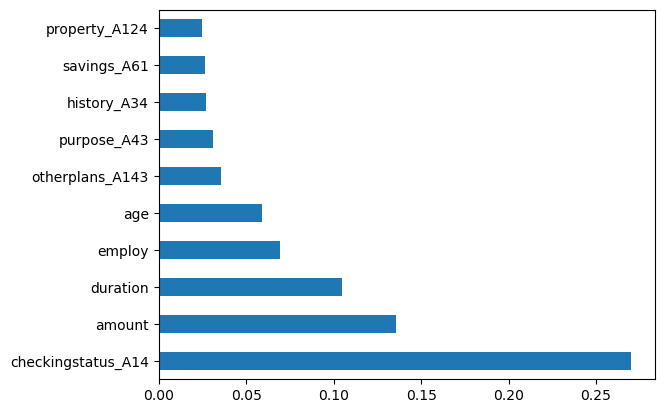

In [36]:
import time
T1=time.time()
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision trees from Adaboost

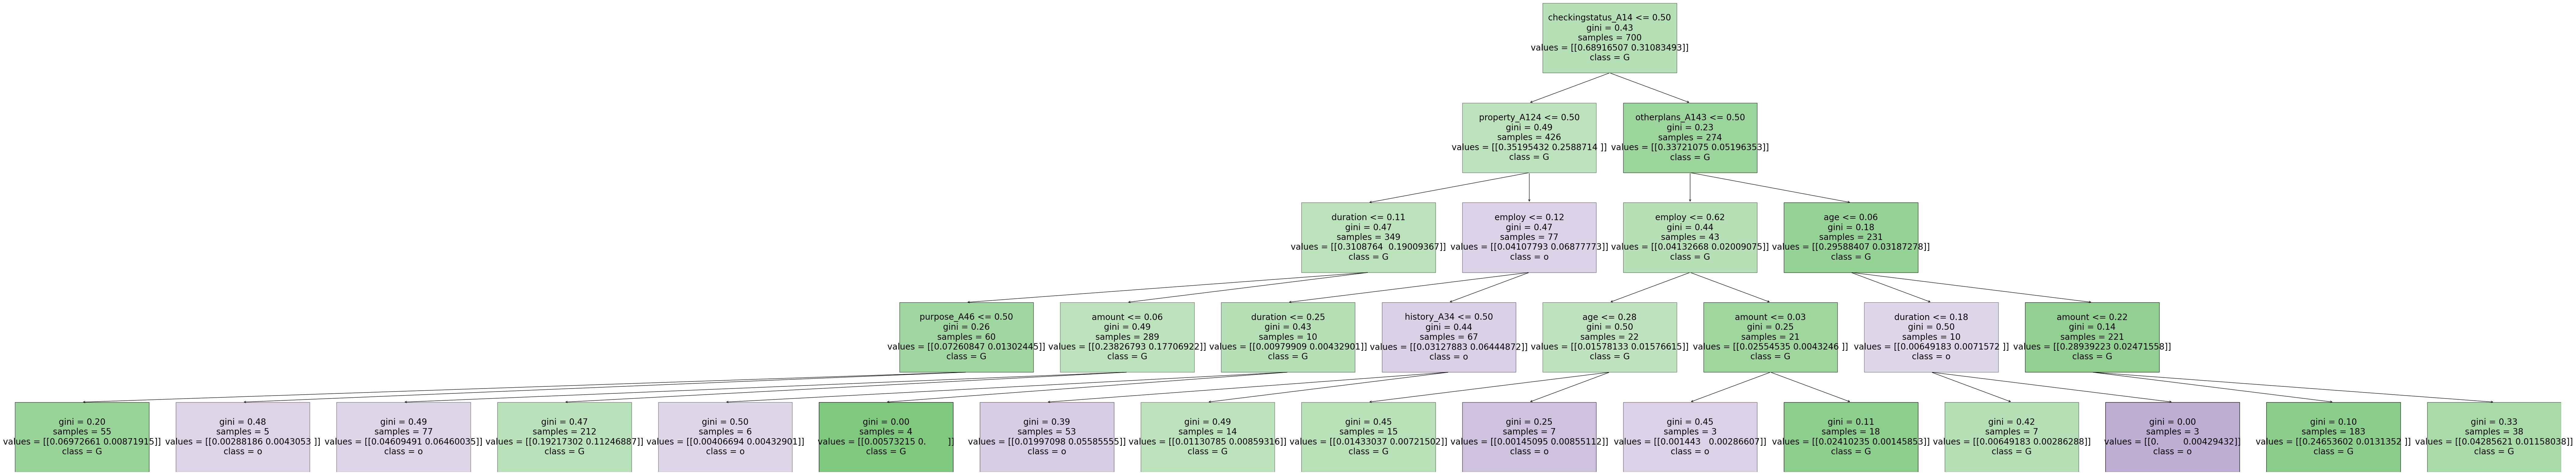

In [37]:
# PLotting 2nd single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[1], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## 14.5 XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       216
           1       0.67      0.43      0.52        84

    accuracy                           0.78       300
   macro avg       0.74      0.67      0.

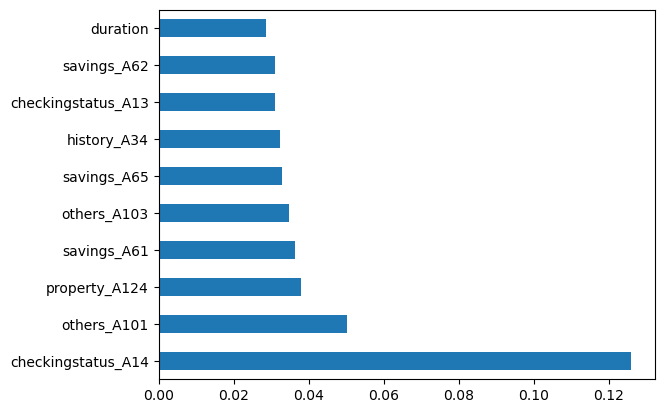

In [38]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a single Decision tree out of XGBoost

In [39]:
# Setting up the os path for the Graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

<AxesSubplot:>

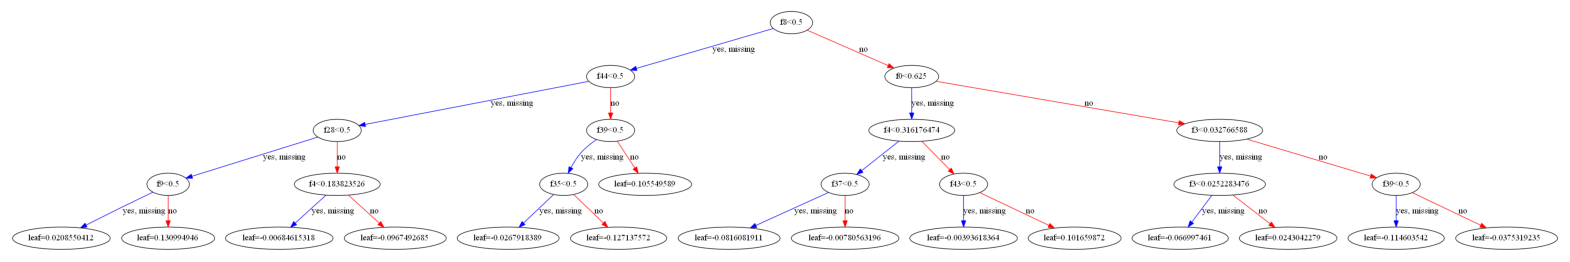

In [40]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## 14.6 KNN

In [41]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN
T2=time.time()
print("Time taken:", T2-T1)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       216
           1       0.59      0.35      0.44        84

    accuracy                           0.75       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300

[[196  20]
 [ 55  29]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.67569892 0.65263158 0.68221388 0.75159817 0.744      0.70133333
 0.68949772 0.69317015 0.73104474 0.71714424]

Final Average Accuracy of the model: 0.7
Time taken: 0.11659741401672363


## 14.7 SVM

In [42]:
import time
T1=time.time()
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=8, kernel='rbf', gamma=0.01)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

SVC(C=8, gamma=0.01)
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       216
           1       0.63      0.38      0.47        84

    accuracy                           0.76       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.75      0.76      0.74       300

[[197  19]
 [ 52  32]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.795594   0.64497905 0.70133333 0.70606061 0.77781287 0.80079051
 0.62968812 0.80197664 0.73947368 0.77781287]

Final Average Accuracy of the model: 0.74
Time taken: 0.47498059272766113


## 14.8 Naive Bayes

In [43]:
import time
T1=time.time()
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

MultinomialNB()
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       216
           1       0.49      0.40      0.44        84

    accuracy                           0.72       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.70      0.72      0.71       300

[[181  35]
 [ 50  34]]
Accuracy of the model on Testing Sample Data: 0.71

Accuracy values for 10-fold Cross Validation:
 [0.74802495 0.68503119 0.71433083 0.70181818 0.7547619  0.78407524
 0.69345238 0.7257269  0.75159817 0.74      ]

Final Average Accuracy of the model: 0.73
Time taken: 0.04393410682678223


## 15. Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing <b>SVM</b> as the final model since it is very fast on this data.

In order to deploy the model we follow below steps

* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings', and 'status'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


#### Step 1. Retraining the model using 100% data

In [45]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=22, kernel='rbf', gamma=0.01)

# Training the model on 100% Data available
FinalSVMModel=clf.fit(X,y)


#### Cross validating the final model accuracy with less predictors

In [46]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalSVMModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.78289474 0.69011858 0.69317015 0.76516129 0.75665219 0.8229249
 0.66403326 0.79002079 0.72604645 0.73549151]

Final Average Accuracy of the model: 0.74


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [47]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalSVMModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalSVMModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#### Step 3. Create a python function

In [48]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalSVMModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [49]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
             'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ  age  amount  duration checkingstatus history purpose savings status
0    A73   22    5951        48            A12     A32     A43     A61    A92
1    A72   40    8951        24            A12     A32     A43     A61    A92


,Predicted Status
0,1
1,0


The Function FunctionPredictResult can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the available cases.

## 16. Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

### Creating the model with few parameters

#### Function for predictions API

In [50]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
         'history', 'purpose', 'savings','status'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_employ='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkingstatus='A12',
                       inp_history='A32',
                       inp_purpose='A43',
                       inp_savings='A61',
                       inp_status='A92')

'{"Predicted Status":{"0":1}}'

In [51]:
# Installing the flask library required to create the API
#!pip install flask

#### Creating Flask API

In [52]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [53]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        employ_value = request.args.get('employ')
        age_value = float(request.args.get('age'))
        amount_value=float(request.args.get('amount'))
        duration_value=float(request.args.get('duration'))
        checkingstatus_value=request.args.get('checkingstatus')
        history_value=request.args.get('history')
        purpose_value=request.args.get('purpose')
        savings_value=request.args.get('savings')
        status_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(
                       inp_employ=employ_value, 
                       inp_age= age_value, 
                       inp_amount=amount_value,
                       inp_duration=duration_value,
                       inp_checkingstatus=checkingstatus_value,
                       inp_history=history_value,
                       inp_purpose=purpose_value,
                       inp_savings=savings_value,
                       inp_status=status_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

#### Starting the API engine

In [54]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)


### Sample URL to call the API
Copy and paste below URL in the web browser

http://127.0.0.1:8080/get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.